In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'data/chipotle.tsv'

In [3]:
# tsv파일이기 때문에 sep='\t'로 구분
chipo = pd.read_csv(file_path, sep='\t')

In [4]:
print(chipo.shape)
print(f'----------------')
print(chipo.info())

(4622, 5)
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [5]:
# choice_description에는 결측값이 존재한다

In [6]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [7]:
print(chipo.columns)
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


In [8]:
# order_id는 범주형 피처이기 때문에 문자화
chipo['order_id'] = chipo['order_id'].astype(str)

chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [9]:
# 보통 1개만 구매하고 특이치로 많이 구매한게 15개가 존재한다

In [10]:
# unique를 통한 범주형 피처의 개수 출력
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


## 인사이트 확인

In [11]:
# 가장 많이 주문한 아이템 Top 10
chipo['item_name'].value_counts().head(10)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [20]:
# 아이템별 주문 개수
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [21]:
# 아이템별 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [35]:
# 시각화로 분석 결과 보기
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

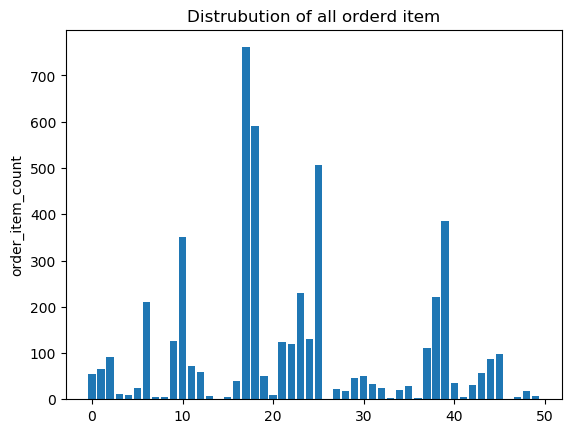

In [38]:
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('order_item_count')
plt.title('Distrubution of all orderd item')
plt.show()

## 데이터 전처리

In [39]:
# item_price 피처에서 문자열 부분 삭제하고 int화

In [40]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [42]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [43]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [44]:
chipo['item_price'].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

## 탐색적 분석

In [45]:
# 주문당 평균 계산금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [46]:
# 각 사람마다(order_id) 얼마나 구매하는지 파악 - 18.81달러 정도를 평균적으로 소비한다

In [47]:
# 한 주문에 10달러 이상 지불한 주문 번호(id) 출력
chipo_group = chipo.groupby('order_id').sum()
result = chipo_group[chipo_group['item_price'] >= 10]
result[:10]

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
1002,2,10.68
1003,2,13.00
1004,2,21.96
1005,3,12.15


In [57]:
# 각 아이템의 가격 구하기
chipo_one_item = chipo[chipo['quantity'] == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by='item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [65]:
# 아이템 가격 분포 그래프 출력
item_a = price_per_item.index.tolist()
x_pos = np.arange(len(item_a))
y_pos = price_per_item['item_price'].values.tolist()

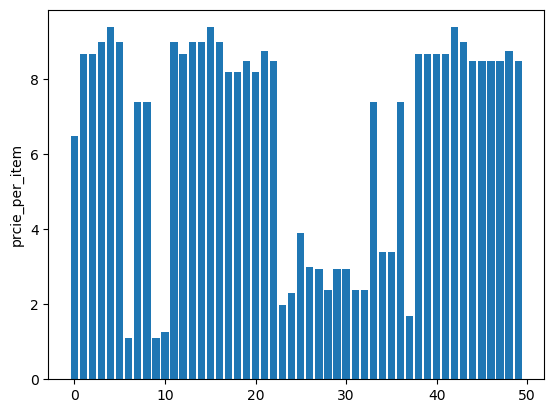

In [66]:
plt.bar(x_pos, y_pos, align='center')
plt.ylabel('prcie_per_item')
plt.show()

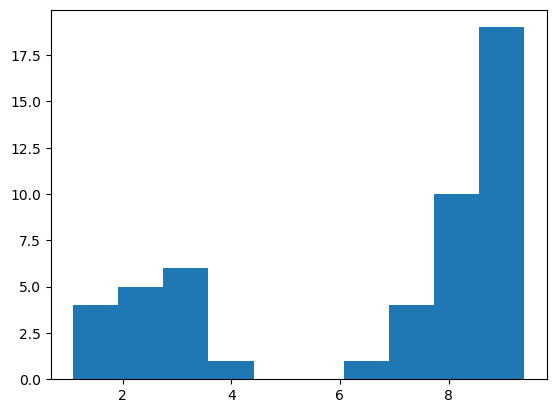

In [69]:
# 아이템 가격 히스토그램
plt.hist(y_pos)
plt.show()

In [76]:
# 가장 비싼 주문에서 아이템이 총 몇개 팔렸는지 구하기
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [82]:
# 'Veggie Salad Bowl'이 몇번 주문 되었는지 구하기
check = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
check = check.drop_duplicates(['order_id', 'item_name'])
len(check)

18

In [93]:
# 'chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기
check = chipo[chipo['item_name'] == 'Chicken Bowl']
result = check[check['quantity'] >= 2]
print(f'{len(result)} 회')

33 회
